# Linear Regression

## Dataset

Fuel Consumption: https://www.kaggle.com/datasets/sarita19/fuel-consumption

In [1]:
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/simple_linear_regression_tutorial/Fuel_Consumption.csv

--2023-04-01 05:54:33--  https://raw.githubusercontent.com/towardsai/tutorials/master/simple_linear_regression_tutorial/Fuel_Consumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘Fuel_Consumption.csv’

Fuel_Consumption.cs 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2023-04-01 05:54:33 (43.5 MB/s) - ‘Fuel_Consumption.csv’ saved [72629/72629]



## Imports 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Loading data into dataframe

In [4]:
df = pd.read_csv("Fuel_Consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df = df[["ENGINESIZE", "CO2EMISSIONS"]]
df.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


## Plot

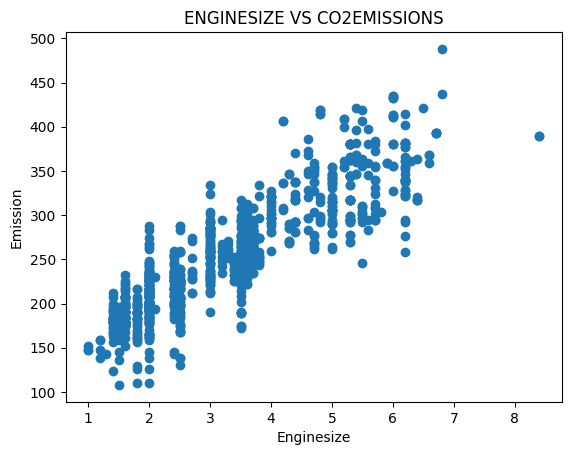

In [10]:
plt.scatter(df["ENGINESIZE"],df["CO2EMISSIONS"])
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

## Train and Test splits

In [35]:
X = np.array(df[["ENGINESIZE"]])
Y = np.array(df[["CO2EMISSIONS"]])

In [36]:
df[["ENGINESIZE"]].values

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print(len(x_train))
print(len(y_train))


print(len(x_test))
print(len(y_test))

853
853
214
214


## Model

In [39]:
linear_model = LinearRegression()

In [40]:
model = linear_model.fit(x_train, y_train)

In [41]:
print(model.coef_)
print(model.intercept_)

[[38.99297872]]
[126.28970217]


In [46]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

## Regression Line

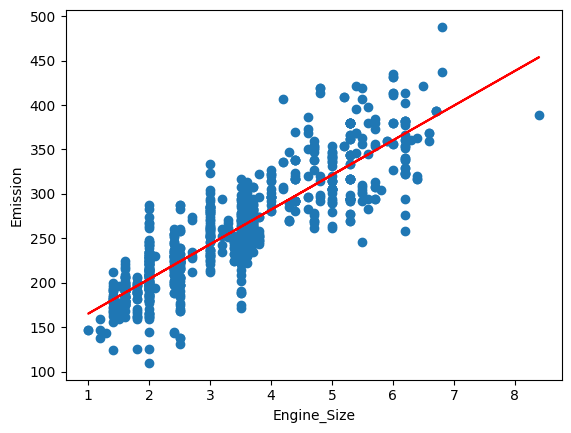

In [47]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

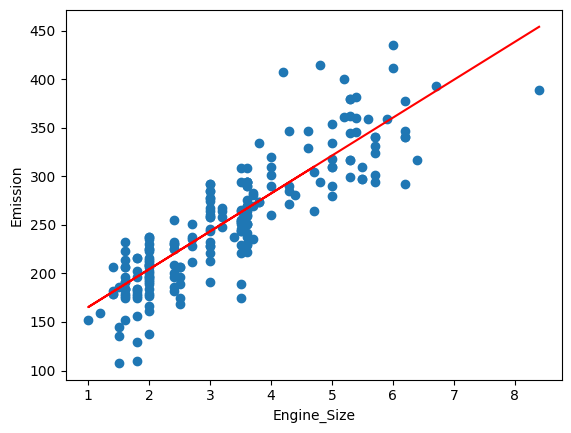

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

## Results

In [53]:
model.score(y_test, y_pred_test)

-32700.314720316568

In [55]:
print(mean_absolute_error(y_test, y_pred_test))

24.09725741170784


In [56]:
print(mean_squared_error(y_test, y_pred_test))

985.9381692274999


In [57]:
print(r2_score(y_test, y_pred_test))

0.7615595731934373
